In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import math as mp

# Reading data

In [2]:
data1=pd.read_csv('2021_Cars_Raw.csv')
data2=pd.read_csv('2021_Vans_Raw.csv')
data2_agg=pd.read_csv('2021.Vans_Aggregated.csv')
data1_agg=pd.read_csv('2021_Cars_Aggregated.csv')
# data2_agg.tail(20)




# Data pre-processing

In [3]:
print('2021_Cars_Raw.csv',data1.shape)
print('2021_Vans_Raw.csv',data2.shape)
print('2021.Vans_Aggregated.csv',data1_agg.shape)
print('2021_Cars_Aggregated.csv',data2_agg.shape)

2021_Cars_Raw.csv (916272, 13)
2021_Vans_Raw.csv (12301, 13)
2021.Vans_Aggregated.csv (94, 19)
2021_Cars_Aggregated.csv (40, 19)


## Adding extra column to distinguish between cars and vans

In [4]:
data1['Type']='car'

data2['Type']='van'
data1_agg['Type']='car'
data1_agg['Avg Price (Mn.INR)']=[2.5, 3.0, 3.0, 3.5, 7.0, 4.5, 2.5, 2.0, 7.5, 30.0, 5.0, 2.5, 6.0, 5.0, 10.0, 2.5, 3.5, 1.5, 2.0, 4.0, 3.0, 3.5, 4.5, 4.0, 2.5, 2.5, 3.5, 7.0, 5.0, 3.5, 3.5, 2.5, 3.0, 20.0, 2.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 5.0, 3.5, 25.0, 2.5, 3.0, 3.0, 2.5, 2.5, 2.5, 3.0, 3.0, 2.5, 2.0, 2.0, 7.0, 4.0, 4.0, 5.0, 4.0, 2.5, 2.0, 3.0, 3.5, 2.5, 3.0, 2.5, 3.0, 2.5, 2.0, 2.0, 2.0, 2.5, 4.0, 3.0, 4.0, 4.0, 5.0, 2.5, 7.0, 2.5, 4.0, 5.0, 3.5, 3.5, 3.0, 3.0, 3.0, 2.5, 3.0, 2.5, 2.5, 2.5, 2.5]

data2_agg['Type']='van'
data2_agg['Avg Price (Mn.INR)']=[5.0, 3.0, 2.5, 4.0, 3.5, 2.8, 4.5, 2.7, 6.0, 5.5, 4.8, 6.5, 4.2, 3.2, 6.3, 3.1, 2.9, 7.0, 3.4, 3.6, 3.7, 6.8, 3.3, 2.6, 4.1, 3.8, 3.9, 4.3, 4.4, 5.1, 5.2, 7.1, 4.9, 4.6, 5.3, 4.7, 6.2, 4.0, 3.8,6.7]




# Data integration 

## raw data

In [5]:
frames=[data1,data2]
data_raw=pd.concat(frames)
display(data_raw.head())
print('data_raw',data_raw.shape)

,OBFCM data source,ID,OBFCM ReportingPeriod,Registration Year,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Total distance travelled in charge depleting operation with engine off (lifetime) (km),Total distance travelled in charge depleting operation with engine running (lifetime) (km),Total distance travelled in driver-selectable charge increasing operation (lifetime) (km),Total fuel consumed in charge depleting operation (lifetime) (l),Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l),Total grid energy into the battery (lifetime) (kWh),Used in calculation,Type
0,OEM,55201566,2021,2021,645.57,8077.5,707.6,2561.5,0.0,248.34,0.0,102.4,1,car
1,OEM,46868086,2021,2021,1363.64,25085.7,10457.4,7449.2,0.0,720.74,0.0,3098.3,1,car
2,OEM,55201567,2021,2021,121.03,3585.7,2371.1,1064.8,0.0,108.56,0.0,850.7,1,car
3,OEM,55201568,2021,2021,311.34,6770.1,3605.6,1466.6,0.0,160.05,0.0,1216.7,1,car
4,OEM,55201574,2021,2021,690.69,10727.7,3226.1,1079.8,0.0,125.23,0.0,1155.0,1,car


data_raw (928573, 14)


## Aggregated data

In [6]:
frames2=[data1_agg,data2_agg]
data_agg=pd.concat(frames2)
display(data_agg.head())
print('data_agg',data_agg.shape)

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),...,OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
0,KIA,PETROL,1025,6.39,5.56,0.82,14.78,145.50,126.76,18.74,...,6.33,5.60,0.72,12.93,144.17,127.66,16.51,12.93,car,2.5
1,SKODA,PETROL,2494,7.29,6.13,1.16,18.96,166.07,139.60,26.47,...,7.16,6.12,1.03,16.90,163.03,139.45,23.57,16.90,car,3.0
2,HYUNDAI CZECH,PETROL,1592,7.22,6.26,0.95,15.23,164.36,142.64,21.72,...,7.09,6.23,0.86,13.83,161.59,141.95,19.63,13.83,car,3.0
3,TOYOTA,PETROL,6338,5.60,4.99,0.61,12.27,127.52,113.59,13.93,...,5.67,5.05,0.62,12.30,129.15,115.00,14.14,12.30,car,3.5
4,MERCEDES-BENZ AG,PETROL,29995,10.53,8.46,2.07,24.45,239.83,192.71,47.13,...,10.68,8.67,2.01,23.12,243.30,197.61,45.68,23.12,car,7.0


data_agg (134, 21)


## Shapes of data after integration

In [7]:
print('Data_raw',data_raw.shape)
print('Data_agg',data_agg.shape)

Data_raw (928573, 14)
Data_agg (134, 21)


# Data Cleaning

## Checking for any duplicates in the data and if they have duplicates droping it

In [8]:
print("Shapes of Data before droping duplicates")
print('Data_raw',data_raw.shape)
print('Data_agg',data_agg.shape)

#Checking for duplicates
data_raw=data_raw.drop_duplicates()
data_agg=data_agg.drop_duplicates()

print("Shapes of Data after droping duplicates")
print('Data_raw',data_raw.shape)
print('Data_agg',data_agg.shape)

Shapes of Data before droping duplicates
Data_raw (928573, 14)
Data_agg (134, 21)
Shapes of Data after droping duplicates
Data_raw (928570, 14)
Data_agg (134, 21)


### Data_raw had 3 duplicate rows and Data_agg had no duplicate rows

##### Since there is no change in the shape of data there are no duplicate tuples in the Data

In [9]:
#Checking the percentage of null value
print('Percentage of data after Droping Null columns')
print("data_raw :\n",round((data_raw.isnull().sum()/data_raw.shape[0])*100,2))
print("data_agg :\n",round((data_agg.isnull().sum()/data_agg.shape[0])*100,2))


Percentage of data after Droping Null columns
data_raw :
 OBFCM data source                                                                              0.00
ID                                                                                             0.00
OBFCM ReportingPeriod                                                                          0.00
Registration Year                                                                              0.00
Total fuel consumed (lifetime) (l)                                                             0.00
Total distance travelled (lifetime) (km)                                                       0.00
Total distance travelled in charge depleting operation with engine off (lifetime) (km)        51.61
Total distance travelled in charge depleting operation with engine running (lifetime) (km)    51.62
Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)    51.25
Total fuel consumed in charge depleting op


### 4 columns from data_raw have null values greater than 50% so instead of imputation and normalization removing the tuples from data is effective
### columns with null values more than 50%
###### Total distance travelled in charge depleting operation with engine off (lifetime) (km) 
###### Total distance travelled in charge depleting operation with engine running (lifetime) (km)   
###### Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)   
###### Total fuel consumed in charge depleting operation (lifetime) (l)                             
###### Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l)
###### Total grid energy into the battery (lifetime) (kWh)                                           



In [11]:
print("Before droping null tuples")
print('Data_raw',data_raw.shape)
print('Data_agg',data_agg.shape)

data_raw=data_raw.dropna()
data_agg=data_agg.dropna()

print("After droping null tuples")
print('Data_raw',data_raw.shape)
print('Data_agg',data_agg.shape)


Before droping null tuples
Data_raw (439533, 14)
Data_agg (134, 21)
After droping null tuples
Data_raw (439533, 14)
Data_agg (134, 21)


## Percentage of data after Droping Null columns

In [12]:
#Checking the percentage of null value
print('Percentage of data after Droping Null columns')
print("data_raw :\n",round((data_raw.isnull().sum()/data_raw.shape[0])*100,2))
print("data_agg :\n",round((data_agg.isnull().sum()/data_agg.shape[0])*100,2))

Percentage of data after Droping Null columns
data_raw :
 OBFCM data source                                                                             0.0
ID                                                                                            0.0
OBFCM ReportingPeriod                                                                         0.0
Registration Year                                                                             0.0
Total fuel consumed (lifetime) (l)                                                            0.0
Total distance travelled (lifetime) (km)                                                      0.0
Total distance travelled in charge depleting operation with engine off (lifetime) (km)        0.0
Total distance travelled in charge depleting operation with engine running (lifetime) (km)    0.0
Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)    0.0
Total fuel consumed in charge depleting operation (lifetime)

### The values like Registration Year,OBFCM ReportingPeriod,Used in calculation  are not used for visualisation hence they are droped from data_raw

In [13]:
data_raw=data_raw.drop(['OBFCM ReportingPeriod','Registration Year','Used in calculation','ID'],axis=1)
data_raw.head(50)

,OBFCM data source,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Total distance travelled in charge depleting operation with engine off (lifetime) (km),Total distance travelled in charge depleting operation with engine running (lifetime) (km),Total distance travelled in driver-selectable charge increasing operation (lifetime) (km),Total fuel consumed in charge depleting operation (lifetime) (l),Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l),Total grid energy into the battery (lifetime) (kWh),Type
0,OEM,645.57,8077.5,707.6,2561.5,0.0,248.34,0.00,102.4,car
1,OEM,1363.64,25085.7,10457.4,7449.2,0.0,720.74,0.00,3098.3,car
2,OEM,121.03,3585.7,2371.1,1064.8,0.0,108.56,0.00,850.7,car
3,OEM,311.34,6770.1,3605.6,1466.6,0.0,160.05,0.00,1216.7,car
4,OEM,690.69,10727.7,3226.1,1079.8,0.0,125.23,0.00,1155.0,car
5,OEM,703.07,10670.4,3183.1,2400.0,0.0,250.00,0.00,934.9,car
6,OEM,1812.90,28690.1,10522.5,12880.4,0.0,1315.02,0.00,3472.6,car
7,OEM,1487.99,26092.6,10183.0,1408.2,29.1,148.40,4.89,3288.4,car
8,OEM,2036.70,20643.9,4110.6,6424.2,0.1,757.75,0.00,1623.0,car
9,OEM,826.45,9492.2,1569.1,284.3,8.1,32.40,1.16,346.0,car


In [14]:
print("After Data reduction data_raw")
data_raw.shape

After Data reduction data_raw


(439533, 10)

### Checking for numeric and categorical columns


In [15]:

#Checking for numerical and categorical colums
print("RAW\n")

# Categorical columns
cat_col_data_raw = [col for col in data_raw.columns if data_raw[col].dtype == 'object']
print('Categorical columns :',cat_col_data_raw)
# Numerical columns
num_col_data_raw = [col for col in data_raw.columns if data_raw[col].dtype != 'object']
print('Numerical columns :',num_col_data_raw)

print("\nAggregated\n")

# Categorical columns
cat_col_data_agg = [col for col in data_agg.columns if data_agg[col].dtype == 'object']
print('Categorical columns :',cat_col_data_agg)
# Numerical columns
num_col_data_agg = [col for col in data_agg.columns if data_agg[col].dtype != 'object']
print('Numerical columns :',num_col_data_agg)



RAW

Categorical columns : ['OBFCM data source', 'Type']
Numerical columns : ['Total fuel consumed (lifetime) (l)', 'Total distance travelled (lifetime) (km)', 'Total distance travelled in charge depleting operation with engine off (lifetime) (km)', 'Total distance travelled in charge depleting operation with engine running (lifetime) (km)', 'Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)', 'Total fuel consumed in charge depleting operation (lifetime) (l)', 'Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l)', 'Total grid energy into the battery (lifetime) (kWh)']

Aggregated

Categorical columns : ['Manufacturer', 'Fuel Type', 'Type']
Numerical columns : ['Number of vehicles', 'OBFCM Fuel consumption (l/100 km)', 'WLTP Fuel consumption (l/100 km)', 'absolute gap Fuel consumption (l/100 km)', 'percentage gap Fuel consumption (%)', 'OBFCM CO2 emissions (g/km)', 'WLTP CO2 emissions (g/km)', 'absolute gap CO2 emi


### Calculating the mean for all columns of numerical values  of all data

In [16]:
temp=['OBFCM data source', 'Type']
temp2=['Manufacturer', 'Fuel Type', 'Type']
data_raw_mean_before={}
data_agg_mean={}


for key in num_col_data_raw:
    if(key not in temp):
        x=data_raw[key].mean()
        data_raw_mean_before[key]=x

for key in num_col_data_agg:
    if(key not in temp2):
        x=data_agg[key].mean()
        data_agg_mean[key]=x
        


display(data_raw_mean_before)
display(data_agg_mean)

{'Total fuel consumed (lifetime) (l)': 443.92857083776323,
 'Total distance travelled (lifetime) (km)': 6500.5499752083015,
 'Total distance travelled in charge depleting operation with engine off (lifetime) (km)': 1861.1205622811813,
 'Total distance travelled in charge depleting operation with engine running (lifetime) (km)': 320.08282836683304,
 'Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)': 2803604.842237876,
 'Total fuel consumed in charge depleting operation (lifetime) (l)': 96.83217014626136,
 'Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l)': 280363.844700477,
 'Total grid energy into the battery (lifetime) (kWh)': 663.3830404088117}

{'Number of vehicles': 4655.679104477612,
 'OBFCM Fuel consumption (l/100 km)': 7.817014925373134,
 'WLTP Fuel consumption (l/100 km)': 5.587910447761195,
 'absolute gap Fuel consumption (l/100 km)': 2.22910447761194,
 'percentage gap Fuel consumption (%)': 79.79149253731339,
 'OBFCM CO2 emissions (g/km)': 186.56037313432833,
 'WLTP CO2 emissions (g/km)': 134.2381343283582,
 'absolute gap CO2 emissions (g/km)': 52.322686567164176,
 'percentage gap CO2 emissions (%)': 79.79149253731339,
 'OBFCM Fuel consumption weighted (l/100 km)': 7.644402985074625,
 'WLTP Fuel consumption weighted (l/100 km)': 5.55559701492537,
 'absolute gap Fuel consumption weighted (l/100 km)': 2.0891791044776125,
 'percentage gap Fuel consumption weighted (%)': 76.81791044776124,
 'OBFCM CO2 emissions weighted (g/km)': 182.41328358208966,
 'WLTP CO2 emissions weighted (g/km)': 133.38514925373138,
 'absolute gap CO2 emissions weighted (g/km)': 49.027462686567176,
 'percentage gap CO2 emissions weighted (%)': 76.81

# Handling the Noisy data


### Removing outlayers and replacing with mean

In [17]:
temp3=['Total fuel consumed (lifetime) (l)','Total distance travelled (lifetime) (km)']

for key in temp3:
    x=data_raw[key].describe()
    min_=x['25%']
    max_=x['75%']+1.5*(x['75%']-x['25%'])
    let=np.array(data_raw[key])
    print('\n',x)
    for i in range(len(let)):
        if (let[i] < min_) or (let[i] > max_):
            let[i] = x['50%']
    data_raw[key]=let;




 count    439533.000000
mean        443.928571
std         653.540873
min           0.000000
25%           3.000000
50%         168.160000
75%         655.850000
max       16926.070000
Name: Total fuel consumed (lifetime) (l), dtype: float64

 count    4.395330e+05
mean     6.500550e+03
std      9.891103e+03
min      0.000000e+00
25%      1.350000e+01
50%      2.900000e+03
75%      9.780000e+03
max      1.851214e+06
Name: Total distance travelled (lifetime) (km), dtype: float64


In [18]:
display(data_raw['Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)'].mean())
display(data_raw['Total distance travelled in charge depleting operation with engine off (lifetime) (km)'].mean())

2803604.842237876

1861.1205622811813

In [19]:
# for col in num_col_car:
#     if(col != 'OBFCM ReportingPeriod' or col != 'Registration Year' or col != 'ID'):
#         data[col]=data1[col]/data_cars.loc['max',col]

# data

In [20]:
data_raw_mean={}
for key in num_col_data_raw:
    if(key not in temp):
        x=data_raw[key].mean()
        data_raw_mean[key]=x
data_raw_mean

{'Total fuel consumed (lifetime) (l)': 358.3754839522367,
 'Total distance travelled (lifetime) (km)': 5618.126318499999,
 'Total distance travelled in charge depleting operation with engine off (lifetime) (km)': 1861.1205622811813,
 'Total distance travelled in charge depleting operation with engine running (lifetime) (km)': 320.08282836683304,
 'Total distance travelled in driver-selectable charge increasing operation (lifetime)  (km)': 2803604.842237876,
 'Total fuel consumed in charge depleting operation (lifetime) (l)': 96.83217014626136,
 'Total fuel consumed in driver-selectable charge increasing operation (lifetime) (l)': 280363.844700477,
 'Total grid energy into the battery (lifetime) (kWh)': 663.3830404088117}

# =================================================================
#                                                     Data visualization
# =================================================================

In [21]:
Car_pie=data_agg[data_agg['Type']=='car']
Van_pie=data_agg[data_agg['Type']=='van']


Car_pie=Car_pie.groupby('Fuel Type').count()
Van_pie=Van_pie.groupby('Fuel Type').count()
display(Car_pie)
display(Van_pie)

,Manufacturer,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,,,
DIESEL,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
DIESEL/ELECTRIC,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
PETROL,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
PETROL/ELECTRIC,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


,Manufacturer,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,,,
DIESEL,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
PETROL,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
PETROL/ELECTRIC,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


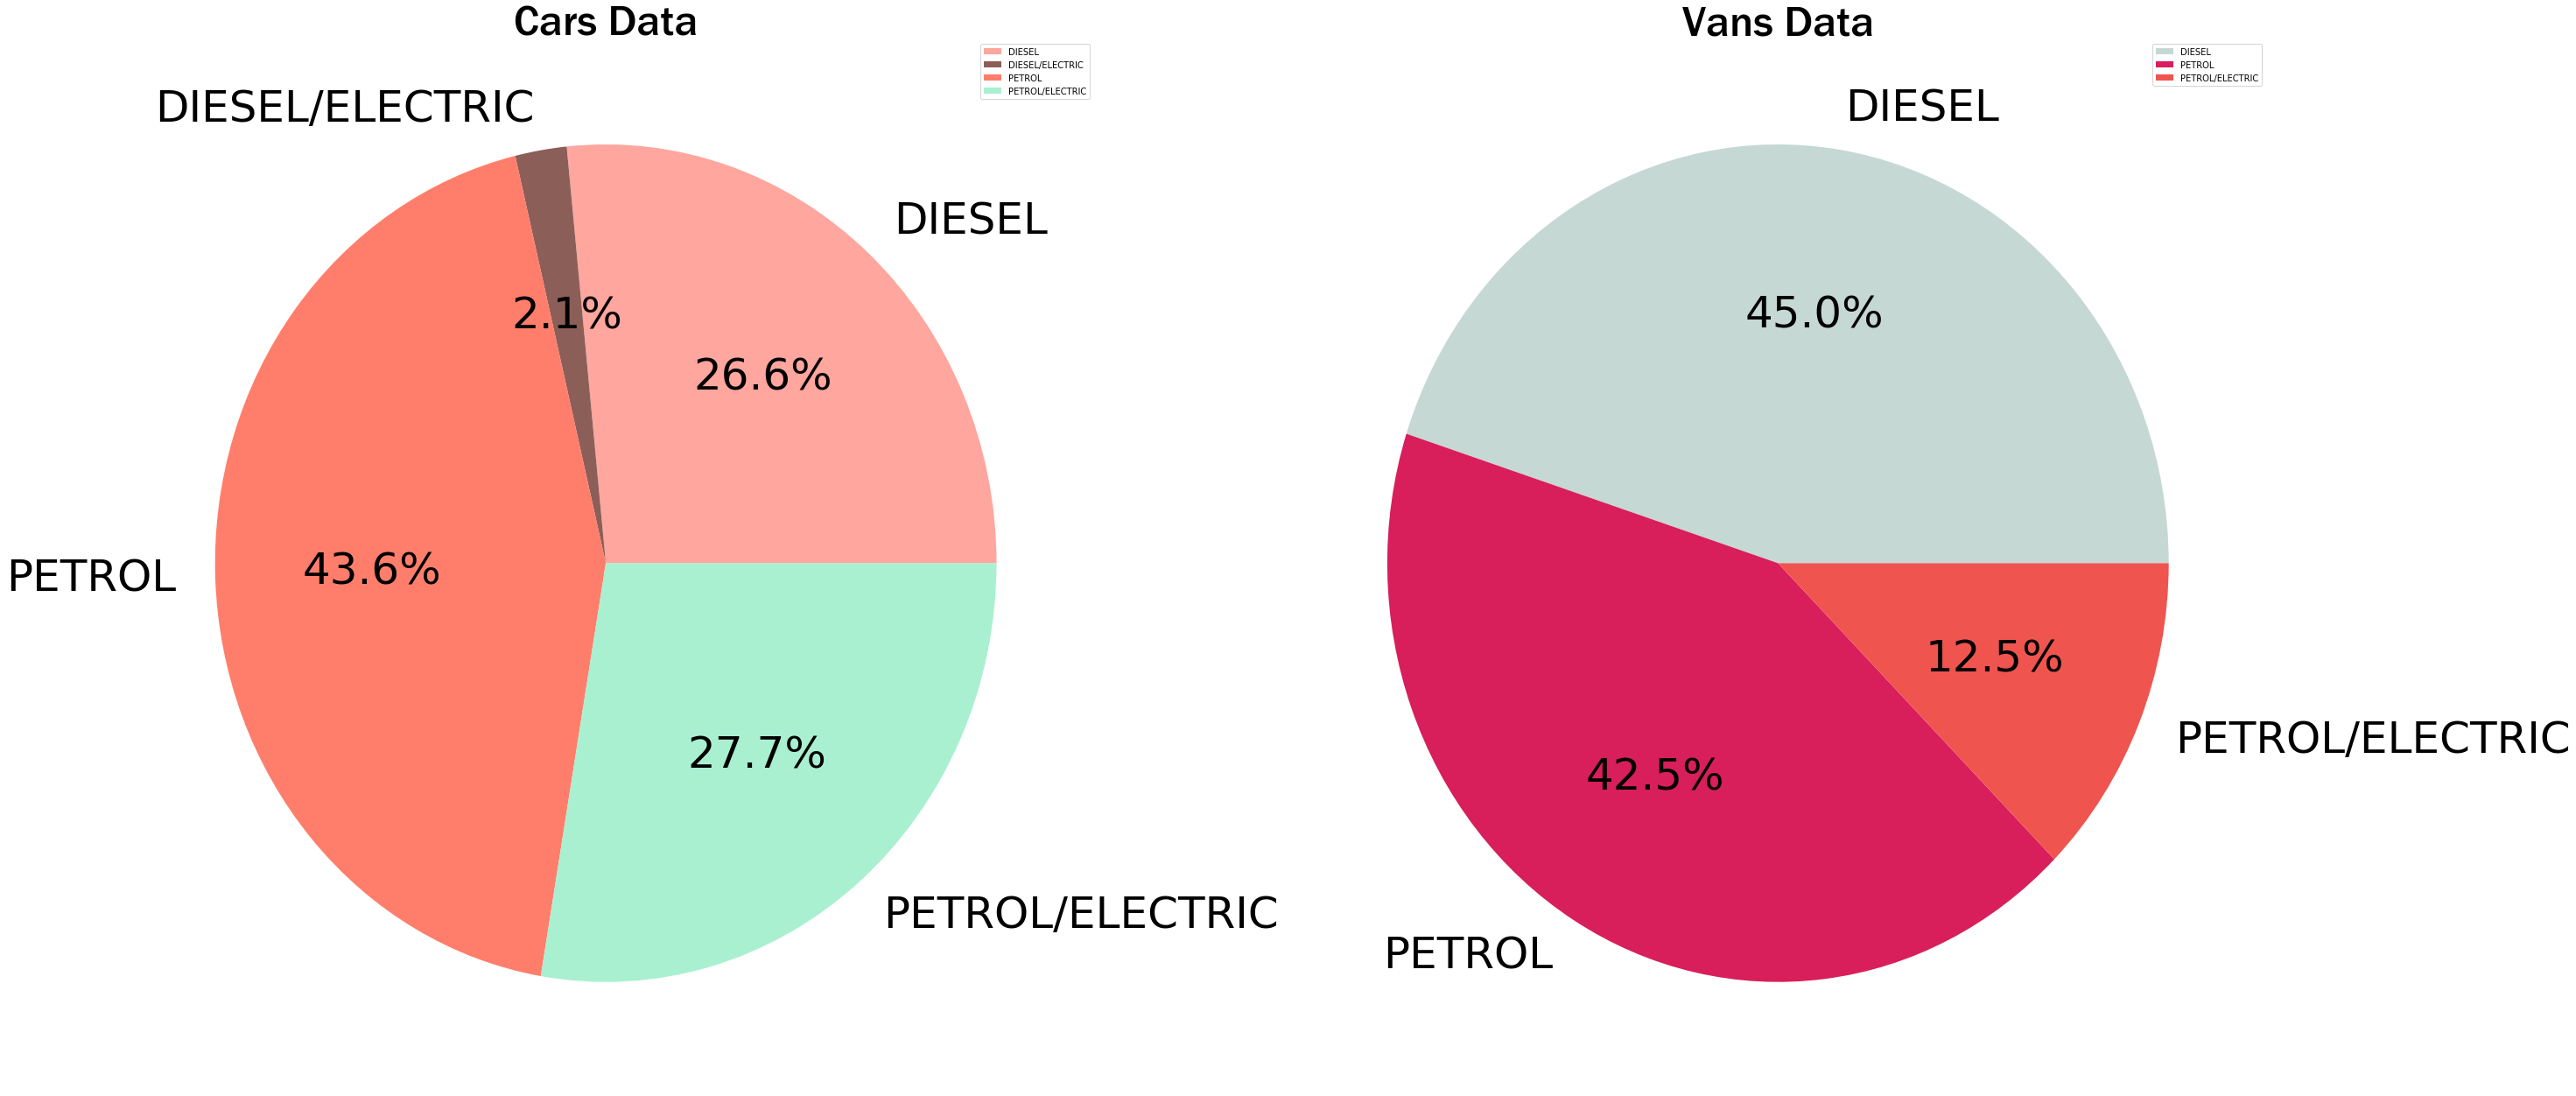

In [35]:
fig,f =plt.subplots(1,2,figsize=(44,22))

f[0].pie(Car_pie['Manufacturer'],labels=Car_pie.index,autopct='%1.1f%%',colors=['#FFA69E','#8C5E58','#FF7E6B','#A9F0D1'],textprops={'fontsize': 50})
f[0].legend()
f[0].set_title('Cars Data',fontname='Franklin Gothic Medium', fontsize=50)

f[1].pie(Van_pie['Manufacturer'],labels=Van_pie.index,autopct='%1.1f%%',colors=['#C6D8D3','#D81E5B','#F0544F'],textprops={'fontsize': 50})
f[1].legend()
f[1].set_title('Vans Data',fontname='Franklin Gothic Medium', fontsize=50)


plt.show()

# The dataset contains above percentage of cars and vans

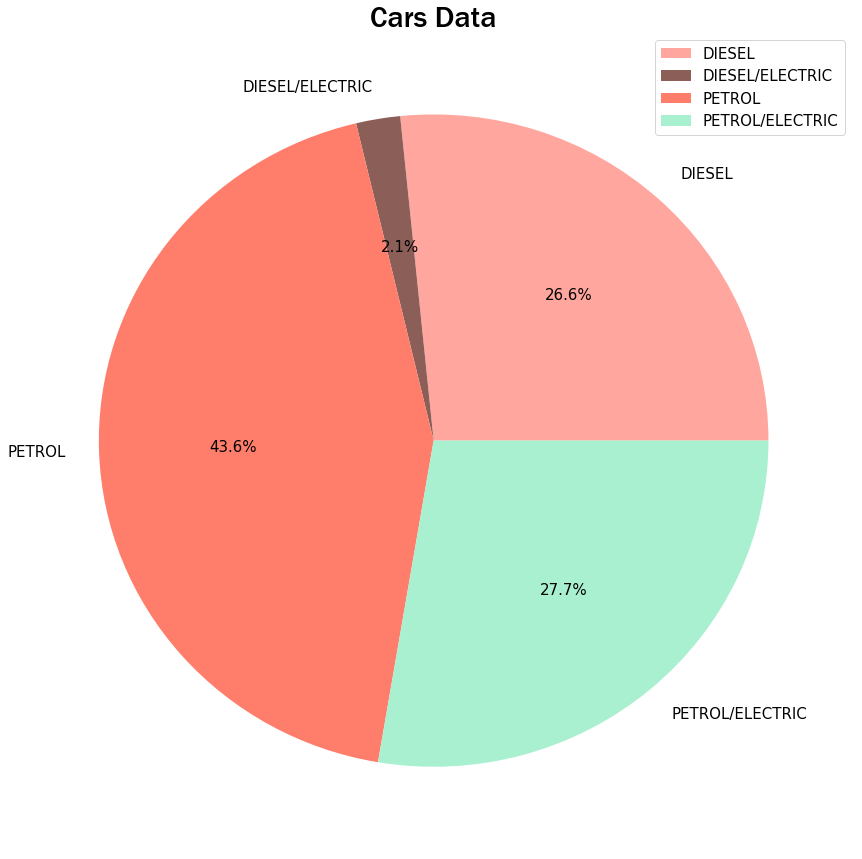

In [50]:
plt.figure(figsize=(15,15))

plt.pie(Car_pie['Manufacturer'],labels=Car_pie.index,autopct='%1.1f%%',colors=['#FFA69E','#8C5E58','#FF7E6B','#A9F0D1'],textprops={'fontsize': 15})
plt.legend(fontsize=15)
plt.title('Cars Data',fontname='Franklin Gothic Medium', fontsize=30)

plt.show()

In [52]:
cars_fuel=data_agg[data_agg['Type']=='car'].groupby('Fuel Type').mean()
vans_fuel=data_agg[data_agg['Type']=='van'].groupby('Fuel Type').mean()

display(cars_fuel)
display(vans_fuel)

,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,
DIESEL,8760.120000,6.776400,5.710800,1.064400,18.729600,178.266000,150.249600,28.016400,18.729600,6.648000,5.685200,0.962800,17.185600,174.899200,149.574400,25.324400,17.185600,3.240000
DIESEL/ELECTRIC,12446.500000,8.150000,1.615000,6.530000,393.055000,214.410000,42.600000,171.810000,393.055000,8.205000,1.620000,6.585000,395.905000,215.960000,42.715000,173.245000,395.905000,7.000000
PETROL,6693.926829,9.183659,7.497317,1.686341,21.035854,209.204146,170.795366,38.408537,21.035854,8.986829,7.530732,1.456341,18.122683,204.723171,171.537561,33.184390,18.122683,4.975610
PETROL/ELECTRIC,3801.807692,6.732692,1.948077,4.785385,261.950385,153.378846,44.368462,109.010769,261.950385,6.618462,1.942692,4.676538,254.646538,150.776538,44.240769,106.534615,254.646538,3.615385


,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,
DIESEL,310.722222,7.588333,6.542222,1.047222,16.652222,199.634444,172.081667,27.554444,16.652222,7.286111,6.333333,0.953333,15.942778,191.712778,166.636111,25.075556,15.942778,4.550000
PETROL,58.117647,8.638824,6.941176,1.698235,22.884118,196.818824,158.131176,38.688824,22.884118,8.432353,6.871765,1.561765,20.718235,192.134118,156.546471,35.588235,20.718235,3.905882
PETROL/ELECTRIC,17.200000,5.348000,1.796000,3.550000,215.152000,121.812000,40.916000,80.898000,215.152000,5.340000,1.798000,3.540000,213.826000,121.606000,40.956000,80.652000,213.826000,6.140000


## Fuel consumed by different types of vehicles to travel a distance of 100Km

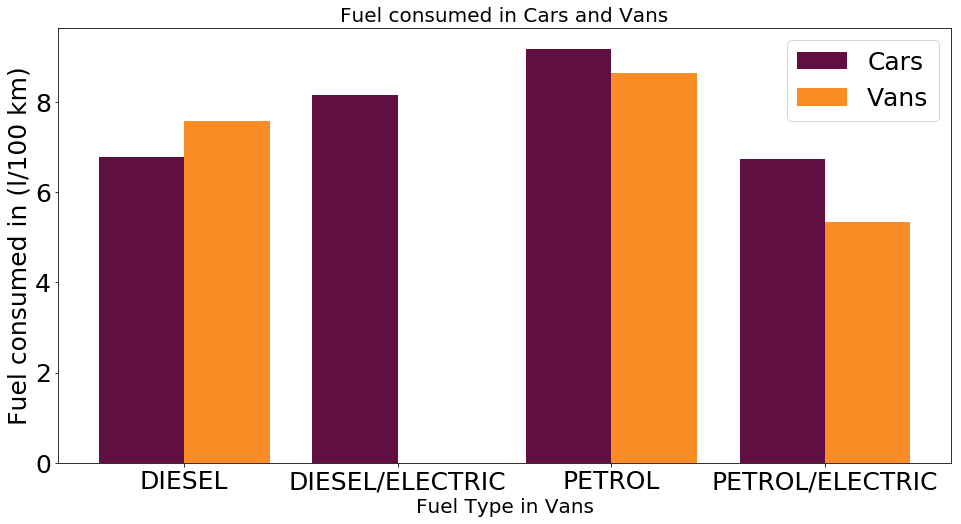

In [91]:
plt.figure(figsize=(16,8))
indexes=np.array([2,3,4,5])
van_values=list(vans_fuel['OBFCM Fuel consumption (l/100 km)'])

van_values.insert(1,0)
plt.bar(indexes-0.2,cars_fuel['OBFCM Fuel consumption (l/100 km)'],0.4,color='#5F0F40',label='Cars')
plt.bar(indexes+0.2,van_values,0.4,color='#FB8B24',label='Vans')
plt.xlabel('Fuel Type in Vans',fontsize=20)
plt.ylabel('Fuel consumed in (l/100 km)')
plt.title('Fuel consumed in Cars and Vans',fontsize=20)
plt.xticks(indexes,cars_fuel.index)
plt.legend()
plt.show()

## Fuel consumed by different types of vehicles to travel a distance of 100KM VS Co2 Emitted By them/100KM

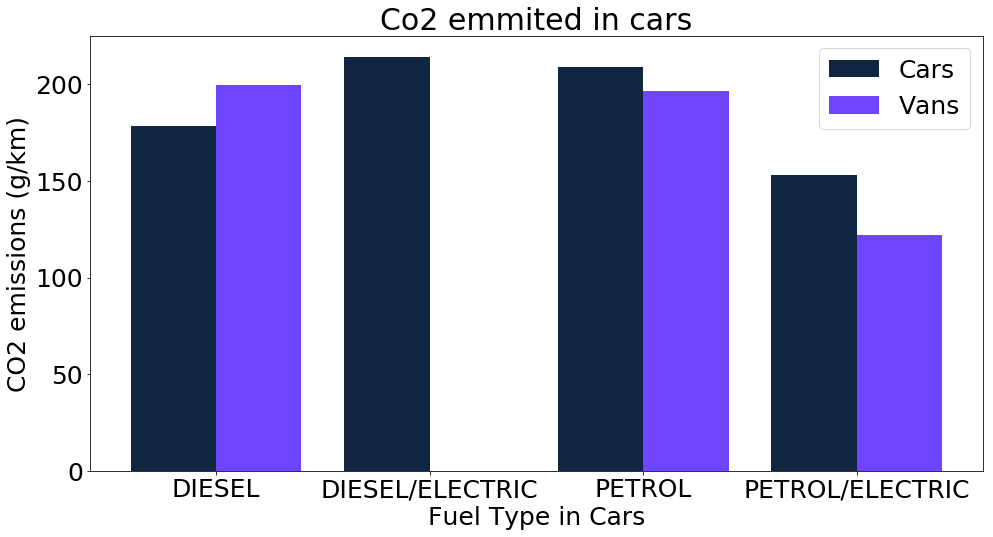

In [94]:
vans_fuel_values=list(vans_fuel['OBFCM CO2 emissions (g/km)'])
vans_fuel_values.insert(1,0)
plt.figure(figsize=(16,8))
plt.bar(indexes-0.2,cars_fuel['OBFCM CO2 emissions (g/km)'],0.4,color='#102542',label='Cars')
plt.bar(indexes+0.2,vans_fuel_values,0.4,color='#6E44FF',label='Vans')
plt.xlabel('Fuel Type in Cars')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Co2 emmited in cars')
plt.legend()
plt.xticks(indexes,cars_fuel.index)

plt.show()

In [67]:
data_agg

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type
0,BMW AG,DIESEL,1,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18,car
1,CHRYSLER,PETROL,5,8.29,6.59,1.69,25.68,188.77,150.20,38.57,25.68,8.05,6.59,1.46,22.20,183.33,150.03,33.31,22.20,car
2,PSA,PETROL,89,8.31,6.98,1.33,19.05,189.34,159.04,30.30,19.05,7.83,6.91,0.93,13.39,178.47,157.39,21.08,13.39,car
3,VOLVO,PETROL,31,8.98,7.24,1.75,24.14,204.63,164.84,39.80,24.14,8.51,7.24,1.27,17.59,193.97,164.95,29.02,17.59,car
4,OPEL AUTOMOBILE,DIESEL,6,5.34,4.83,0.52,10.73,140.63,127.00,13.63,10.73,5.15,4.62,0.53,11.52,135.53,121.52,14.01,11.52,car
5,SEAT,DIESEL,4,6.03,5.21,0.83,15.87,158.74,137.00,21.74,15.87,6.18,5.34,0.84,15.77,162.50,140.36,22.14,15.77,car
6,VOLVO,DIESEL,11,6.70,6.26,0.44,7.00,176.17,164.64,11.53,7.00,6.87,6.39,0.49,7.61,180.84,168.05,12.79,7.61,car
7,RENAULT,PETROL,3,6.94,5.38,1.56,28.88,158.09,122.67,35.42,28.88,5.67,5.29,0.38,7.15,129.24,120.62,8.62,7.15,car
8,AUTOMOBILES PEUGEOT,PETROL/ELECTRIC,1,6.48,1.36,5.11,375.84,147.51,31.00,116.51,375.84,6.48,1.36,5.11,375.84,147.51,31.00,116.51,375.84,car
9,FIAT GROUP,PETROL/ELECTRIC,1,2.93,1.98,0.96,48.51,66.83,45.00,21.83,48.51,2.93,1.98,0.96,48.51,66.83,45.00,21.83,48.51,car


# Is there positive correlation between fuel consumption and CO2 Emmited?

In [24]:
data_agg[['OBFCM Fuel consumption (l/100 km)','OBFCM CO2 emissions (g/km)']].cov()
# sns.heatmap(data_agg[['OBFCM Fuel consumption (l/100 km)','OBFCM CO2 emissions (g/km)']].cov())

,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km)
OBFCM Fuel consumption (l/100 km),9.631916,216.389867
OBFCM CO2 emissions (g/km),216.389867,5012.821768


### As we can see OBFCM Fuel consumption and  OBFCM CO2 emissions are positively correlated

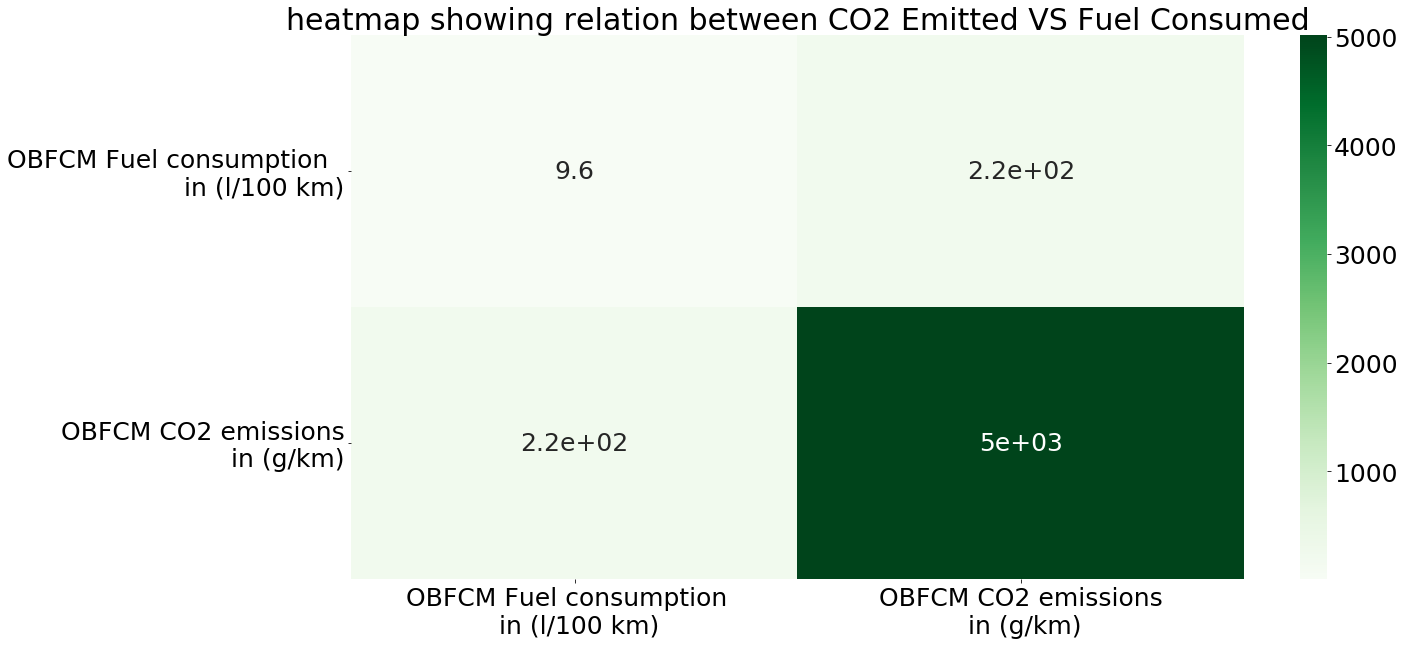

In [109]:
plt.figure(figsize=(20,10))
ax1=sns.heatmap(data_agg[['OBFCM Fuel consumption (l/100 km)','OBFCM CO2 emissions (g/km)']].cov(),cmap='Greens',annot=True)
ax1.set_xticklabels(['OBFCM Fuel consumption  \n in (l/100 km)','OBFCM CO2 emissions\n in (g/km)'])
ax1.set_yticklabels(['OBFCM Fuel consumption  \n in (l/100 km)','OBFCM CO2 emissions\n in (g/km)'])
ax1.set_title('heatmap showing relation between CO2 Emitted VS Fuel Consumed')
plt.show()

# Does fuel consumption and co2 Emmitted linearly Related?

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


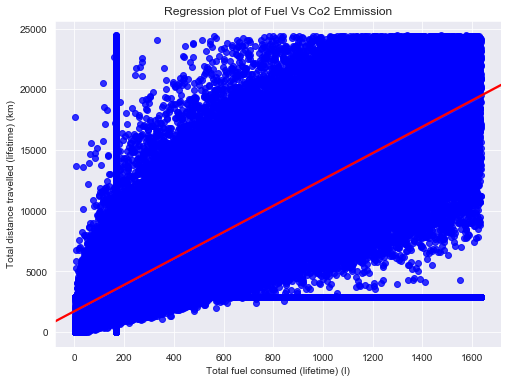

In [26]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.regplot(x='Total fuel consumed (lifetime) (l)',y='Total distance travelled (lifetime) (km)',data=data_raw,color='blue',marker='o',line_kws=dict(color='red'))
plt.title('Regression plot of Fuel Vs Co2 Emmission')
plt.show()

### This Proves that there is linear relationship between fuel and co2 Emmitted

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


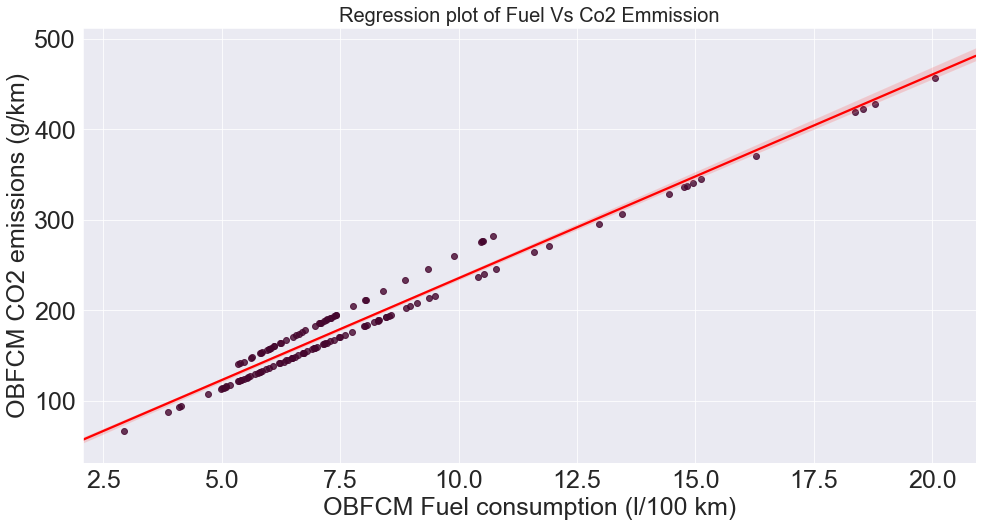

In [121]:
plt.figure(figsize=(16,8))
sns.set_style()
a=sns.regplot(x='OBFCM Fuel consumption (l/100 km)',y='OBFCM CO2 emissions (g/km)',data=data_agg,color='#45062E',marker='o',line_kws=dict(color='red'))
plt.title('Regression plot of Fuel Vs Co2 Emmission',fontsize=20)
plt.show()

# Fuel consumption is varing with different Brands or not ?

# Which Car and Van Brands consume less fuel to Travel 100Km?


# Cars

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


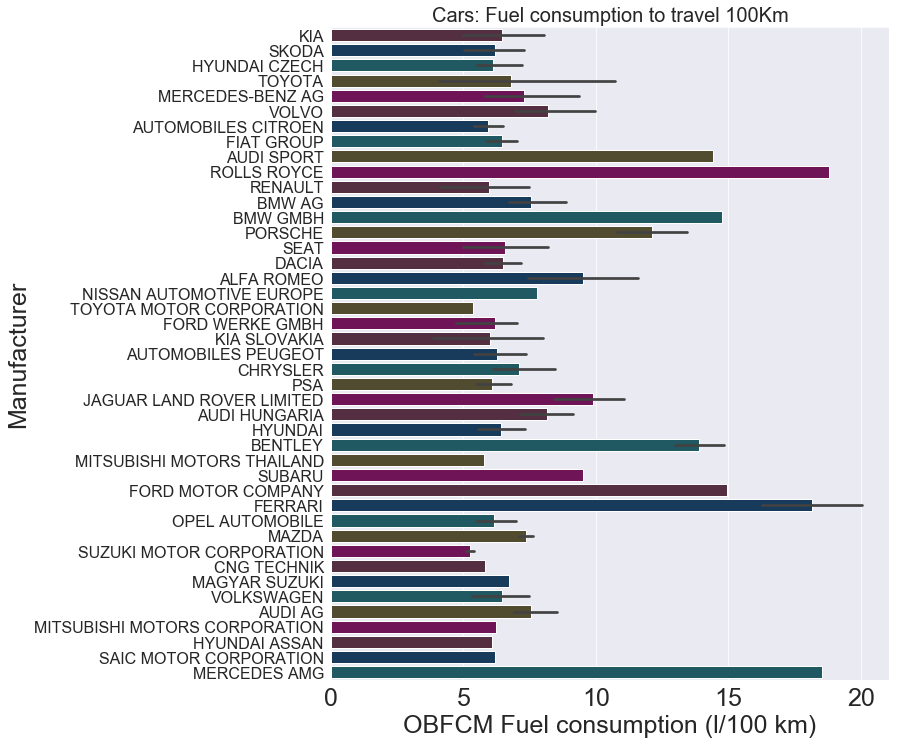

In [152]:
plt.figure(figsize=(10,12))
sns.barplot(y='Manufacturer',x='OBFCM Fuel consumption (l/100 km)',data=data_agg[data_agg['Type']=='car'],palette=['#592941','#0D3B66','#15616D','#574F2A','#7F055F'])
plt.yticks(fontsize=16)
plt.title('Cars: Fuel consumption to travel 100Km',fontsize=20)
plt.show()

# Vans

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


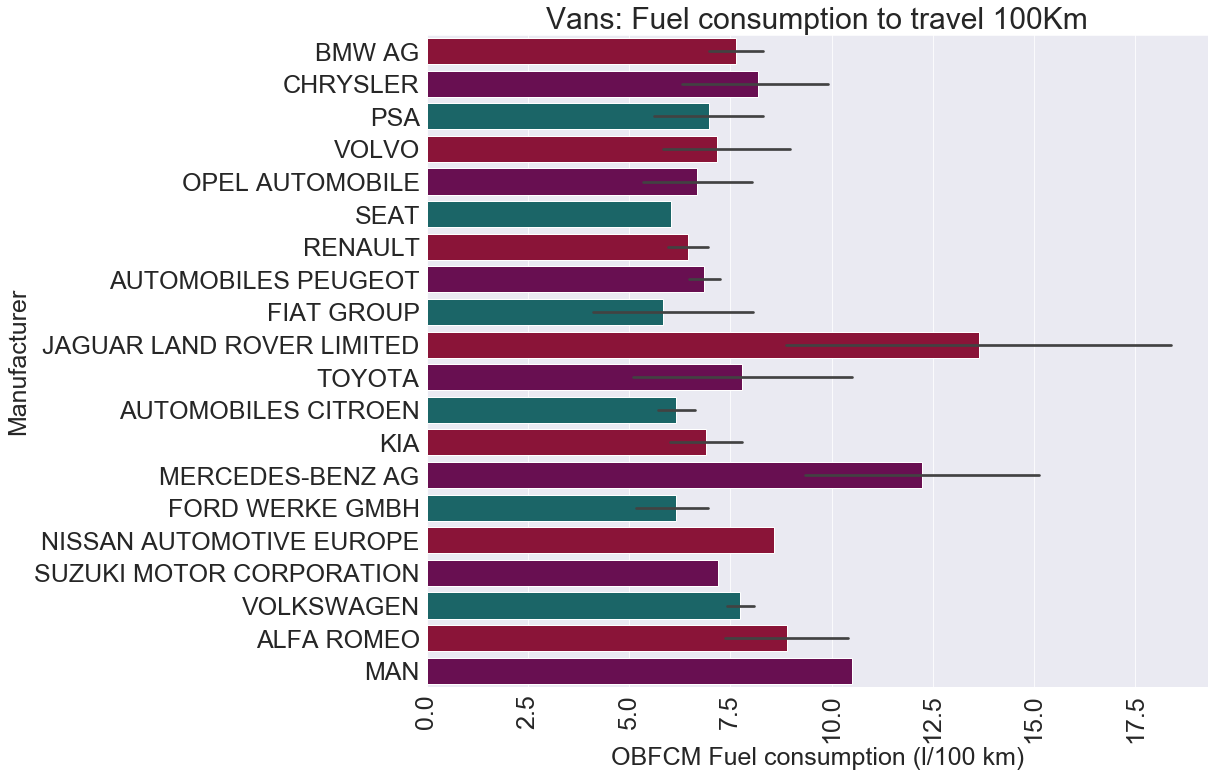

In [156]:
plt.figure(figsize=(14,12))
sns.barplot(y='Manufacturer',x='OBFCM Fuel consumption (l/100 km)',data=data_agg[data_agg['Type']=='van'],palette=['#9E0031','#770058','#0F7173'])
plt.xticks(rotation=90)
plt.title('Vans: Fuel consumption to travel 100Km')
plt.show()

# By Fuel Types

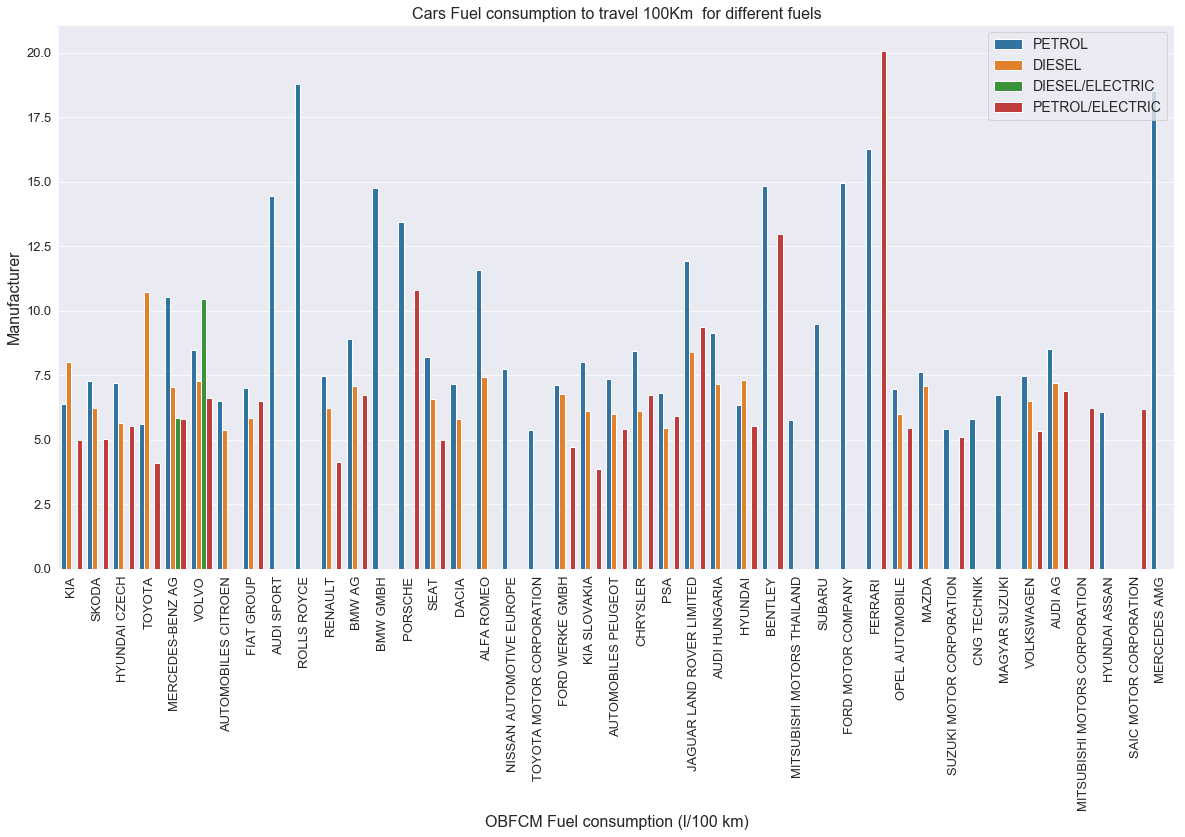

In [197]:
plt.figure(figsize=(20,10))
plt.title('Cars Fuel consumption to travel 100Km  for different fuels',fontsize=16)
sns.barplot(x='Manufacturer',y='OBFCM Fuel consumption (l/100 km)',hue='Fuel Type',data=data_agg[data_agg['Type']=='car'])
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.ylabel('Manufacturer',fontsize=16)
plt.xlabel('OBFCM Fuel consumption (l/100 km)',fontsize=16)
plt.legend(loc='upper right',fontsize=14)


           
plt.show()

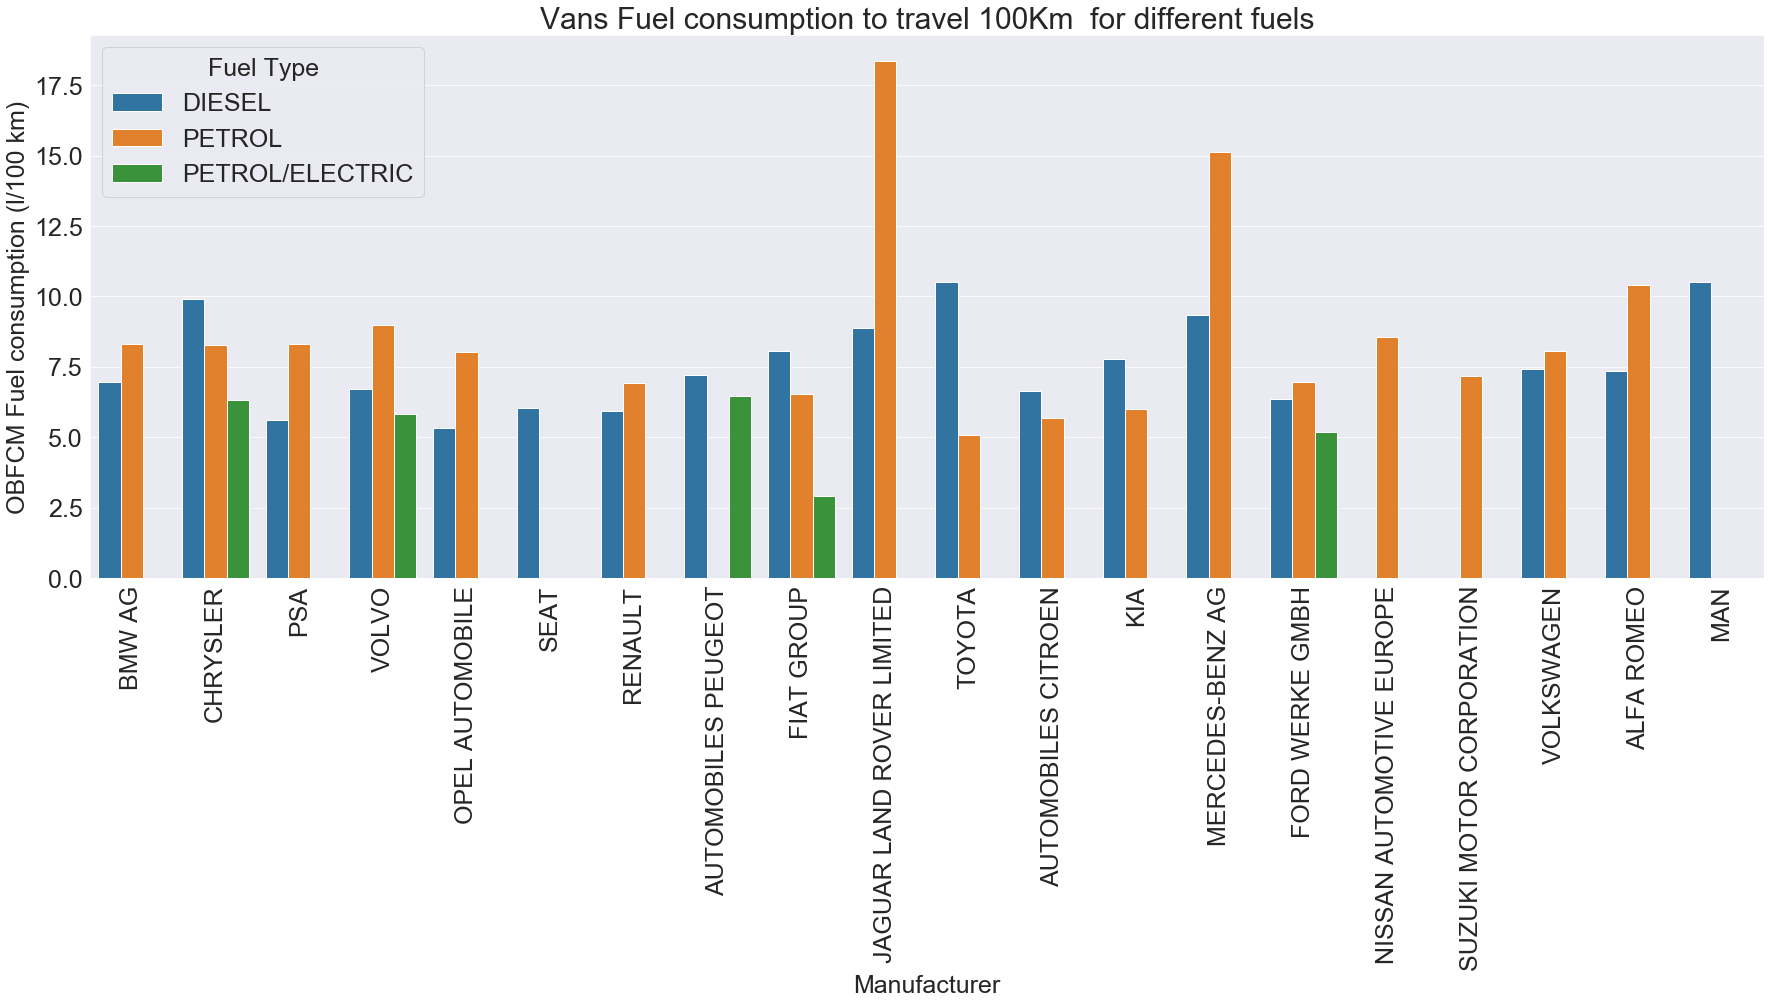

In [198]:
plt.figure(figsize=(30,10))
plt.title('Vans Fuel consumption to travel 100Km  for different fuels')
sns.barplot(x='Manufacturer',y='OBFCM Fuel consumption (l/100 km)',hue='Fuel Type',data=data_agg[data_agg['Type']=='van'])
plt.xticks(rotation=90)
plt.show()

# Does Car/Van prices depend upon fuel Types ?

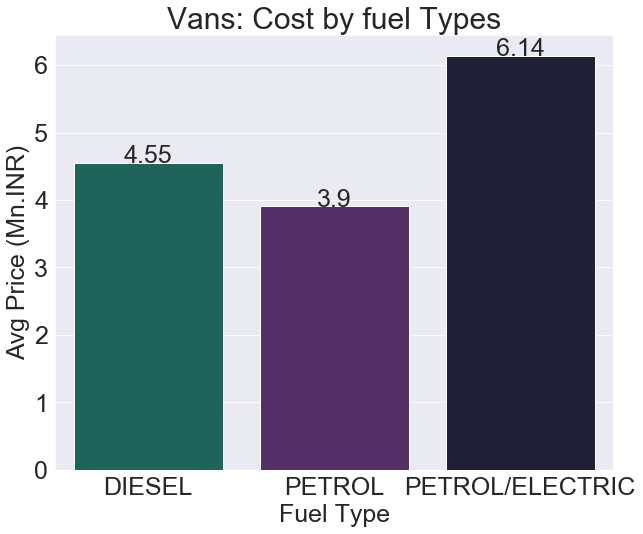

In [164]:
data=data_agg[data_agg['Type']=='van']
data=data.groupby('Fuel Type').mean()
# display(data)

plt.figure(figsize=(10,8))
sns.barplot(x=data.index,y='Avg Price (Mn.INR)',data=data,palette=['#136F63','#55286F','#1B1B3A'])
# plt.xticks(rotation=90)
plt.title('Vans: Cost by fuel Types')

Values=data['Avg Price (Mn.INR)']

plt.text(0,Values[0],4.55,ha='center')
plt.text(1,Values[1],3.9,ha='center')
plt.text(2,Values[2],6.14,ha='center')
# plt.text(3,Values[3],Values[3],ha='center')

plt.show()

,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,
DIESEL,5223.162791,7.116279,6.058837,1.057209,17.860000,187.210930,159.388605,27.823023,17.860000,6.915116,5.956512,0.958837,16.665349,181.937442,156.716512,25.220233,16.665349,3.788372
DIESEL/ELECTRIC,12446.500000,8.150000,1.615000,6.530000,393.055000,214.410000,42.600000,171.810000,393.055000,8.205000,1.620000,6.585000,395.905000,215.960000,42.715000,173.245000,395.905000,7.000000
PETROL,4748.948276,9.023966,7.334310,1.689828,21.577586,205.573966,167.083448,38.490690,21.577586,8.824310,7.337586,1.487241,18.883448,201.033276,167.143621,33.888966,18.883448,4.662069
PETROL/ELECTRIC,3191.387097,6.509355,1.923548,4.586129,254.402258,148.287419,43.811613,104.476452,254.402258,6.412258,1.919355,4.493226,248.062581,146.071613,43.710968,102.360000,248.062581,4.022581


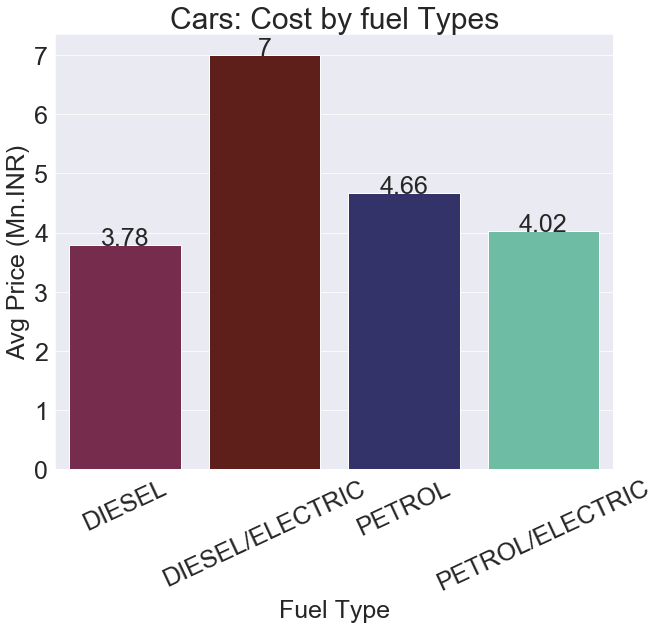

In [173]:
data=data_agg[data_agg['Type']=='car']
data=data_agg.groupby('Fuel Type').mean()
display(data)

plt.figure(figsize=(10,8))
sns.barplot(x=data.index,y='Avg Price (Mn.INR)',data=data,palette=['#82204A','#69140E','#2A2A72','#61C9A8'])
plt.xticks(rotation=25)
plt.title('Cars: Cost by fuel Types')

Values=data['Avg Price (Mn.INR)']

plt.text(0,Values[0],3.78,ha='center')
plt.text(1,Values[1],7,ha='center')
plt.text(2,Values[2],4.66,ha='center')
plt.text(3,Values[3],4.02,ha='center')

plt.show()

# Building model for fuel consumption vs co2 Emmitted


# Training  Data

In [15]:
datamodelshapeCar=mp.ceil(data_agg[data_agg['Type']=='car'].shape[0]*0.8)
datamodelshapeVan=mp.ceil(data_agg[data_agg['Type']=='van'].shape[0]*0.9)
display(datamodelshapeCar,datamodelshapeVan)

Training_Car=data_agg[data_agg['Type']=='car'].head(datamodelshapeCar)
Traing_Van=data_agg[data_agg['Type']=='van'].head(datamodelshapeVan)

display(Training_Car.groupby('Fuel Type').count(),Traing_Van.groupby('Fuel Type').count())


76

36

,Manufacturer,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,,,
DIESEL,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
DIESEL/ELECTRIC,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
PETROL,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
PETROL/ELECTRIC,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


,Manufacturer,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
Fuel Type,,,,,,,,,,,,,,,,,,,,
DIESEL,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
PETROL,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
PETROL/ELECTRIC,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


# Cars

In [16]:
# Xbar
xMeanC=Training_Car['OBFCM Fuel consumption (l/100 km)'].mean()
print('Training_Car[OBFCM Fuel consumption (l/100 km)]',xMeanC)

xMeanV=Traing_Van['OBFCM Fuel consumption (l/100 km)'].mean()
display('Traing_Van[OBFCM Fuel consumption (l/100 km)]',xMeanV)


# Ybar
yMeanC=Training_Car['OBFCM CO2 emissions (g/km)'].mean()
print('Training_Car[OBFCM CO2 emissions (g/km)]',yMeanC)


yMeanV=Traing_Van['OBFCM CO2 emissions (g/km)'].mean()
print('Traing_Van[OBFCM CO2 emissions (g/km)]',yMeanV)

# XYbar
xyMeanC=Training_Car['OBFCM CO2 emissions (g/km)']*Training_Car['OBFCM Fuel consumption (l/100 km)']
xyMeanC=xyMeanC.mean()
print('XYmean Car',xyMeanC)

xyMeanV=Traing_Van['OBFCM CO2 emissions (g/km)']*Traing_Van['OBFCM Fuel consumption (l/100 km)']
xyMeanV=xyMeanV.mean()
print('XYmean Van',xyMeanV)

# x^2bar
X2MeanC=Training_Car['OBFCM Fuel consumption (l/100 km)']*Training_Car['OBFCM Fuel consumption (l/100 km)']
X2MeanC=X2MeanC.mean()
print('x^2 mean Car',X2MeanC)


X2MeanV=Traing_Van['OBFCM Fuel consumption (l/100 km)']*Traing_Van['OBFCM Fuel consumption (l/100 km)']
X2MeanV=X2MeanV.mean()
print('x^2 mean Van',X2MeanV)

Training_Car[OBFCM Fuel consumption (l/100 km)] 8.100263157894735


'Traing_Van[OBFCM Fuel consumption (l/100 km)]'

7.828055555555555

Training_Car[OBFCM CO2 emissions (g/km)] 192.53618421052633
Traing_Van[OBFCM CO2 emissions (g/km)] 191.72
XYmean Car 1787.1110434210525
XYmean Van 1666.3024111111115
x^2 mean Car 75.93059210526313
x^2 mean Van 68.48881944444446


# Liner Regression model for Car


In [17]:
a1Car=(xyMeanC-xMeanC*yMeanC)/(X2MeanC-(xMeanC*xMeanC))
display("a1Car",a1Car)

a0Car=yMeanC-a1Car*xMeanC
display("a0Car",a0Car)

def returnCo2Car(x):
     return a0Car+a1Car*x
    
    
def returnfuelCar(y):
    return (y-a0Car)/a1Car

'a1Car'

22.05409371753515

'a0Car'

13.892221389618612

# Linear Regression model for vans 

In [18]:
a1Van=(xyMeanV-xMeanV*yMeanV)/(X2MeanV-(xMeanV*xMeanV))
display("a1Van",a1Van)

a0Van=yMeanV-a1Car*xMeanV
display("a0Van",a0Van)

def returnCo2Van(x):
     return a0Van+a1Van*x
    
    
def returnFuelVan(y):
    return (y-a0Van)/a1Van

'a1Van'

22.95412018227916

'a0Van'

19.079329151706105

# Testing the model for Cars

# Testing Data

In [15]:
Testiing_Car=data_agg[data_agg['Type']=='car'].tail(mp.ceil(datamodelshapeCar*0.2))
Testiing_Car=Testiing_Car[['OBFCM Fuel consumption (l/100 km)','OBFCM CO2 emissions (g/km)']]
display(Testiing_Car)

Testiing_Van=data_agg[data_agg['Type']=='van'].tail(mp.ceil(datamodelshapeVan*0.1))
Testiing_Van=Testiing_Van[['OBFCM Fuel consumption (l/100 km)','OBFCM CO2 emissions (g/km)']]
display(Testiing_Van)

,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km)
78,6.62,150.71
79,3.87,88.13
80,5.40,122.95
81,6.72,153.05
82,6.00,157.74
83,5.53,126.03
84,7.16,163.04
85,5.00,114.01
86,5.04,114.86
87,4.09,93.21


,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km)
36,5.18,118.00
37,10.41,237.18
38,6.95,158.27
39,5.84,133.03


In [40]:
temp=np.array(Testiing_Car['OBFCM Fuel consumption (l/100 km)'])
temp=map(returnCo2Car,temp)

Testiing_Car['Model Co2 Values']=list(temp)

temp=np.array(Testiing_Car['OBFCM CO2 emissions (g/km)'])
temp=map(returnfuelCar,temp)

Testiing_Car['Model fuel Values']=list(temp)

In [109]:
Testiing_Car

,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km),Model Co2 Values,Model fuel Values
78,6.62,150.71,159.890322,6.203736
79,3.87,88.13,99.241564,3.366168
80,5.40,122.95,132.984327,4.945013
81,6.72,153.05,162.095731,6.309839
82,6.00,157.74,146.216784,6.522498
83,5.53,126.03,135.851360,5.084670
84,7.16,163.04,171.799532,6.762816
85,5.00,114.01,124.162690,4.539646
86,5.04,114.86,125.044854,4.578188
87,4.09,93.21,104.093465,3.596510


In [41]:
temp=np.array(Testiing_Van['OBFCM Fuel consumption (l/100 km)'])
temp=map(returnCo2Van,temp)

Testiing_Van['Model Co2 Values']=list(temp)

temp=np.array(Testiing_Van['OBFCM CO2 emissions (g/km)'])
temp=map(returnFuelVan,temp)

Testiing_Van['Model fuel Values']=list(temp)

In [111]:
Testiing_Van

,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km),Model Co2 Values,Model fuel Values
36,5.18,118.00,137.981672,4.309495
37,10.41,237.18,258.031720,9.501591
38,6.95,158.27,178.610464,6.063864
39,5.84,133.03,153.131391,4.964280


### Measuring accuracy of model

In [42]:
def fun1(x,y):
    return (x-abs(x-y))/x*100

In [43]:
Testiing_Car['Fuel Accuracy']=list(map(fun1,Testiing_Car['OBFCM Fuel consumption (l/100 km)'],Testiing_Car['Model fuel Values']))
Testiing_Car
Testiing_Car['Co2 Accuracy']=list(map(fun1,Testiing_Car['OBFCM CO2 emissions (g/km)'],Testiing_Car['Model Co2 Values']))
Testiing_Car


,OBFCM Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km),Model Co2 Values,Model fuel Values,Fuel Accuracy,Co2 Accuracy
78,6.62,150.71,159.890322,6.203736,93.712027,93.908618
79,3.87,88.13,99.241564,3.366168,86.981078,87.391848
80,5.40,122.95,132.984327,4.945013,91.574314,91.838693
81,6.72,153.05,162.095731,6.309839,93.896412,94.089689
82,6.00,157.74,146.216784,6.522498,91.291703,92.694804
83,5.53,126.03,135.851360,5.084670,91.947008,92.207126
84,7.16,163.04,171.799532,6.762816,94.452738,94.627372
85,5.00,114.01,124.162690,4.539646,90.792920,91.094913
86,5.04,114.86,125.044854,4.578188,90.837056,91.132811
87,4.09,93.21,104.093465,3.596510,87.934241,88.323716


In [44]:
Testiing_Van['Fuel Accuracy']=list(map(fun1,Testiing_Van['OBFCM Fuel consumption (l/100 km)'],Testiing_Van['Model fuel Values']))
Testiing_Car['Type']='car'
Testiing_Van['Co2 Accuracy']=list(map(fun1,Testiing_Van['OBFCM CO2 emissions (g/km)'],Testiing_Van['Model Co2 Values']))
Testiing_Van['Type']='van'

# Result of testing

# For Fuel Consumed Measured Vs Calculated

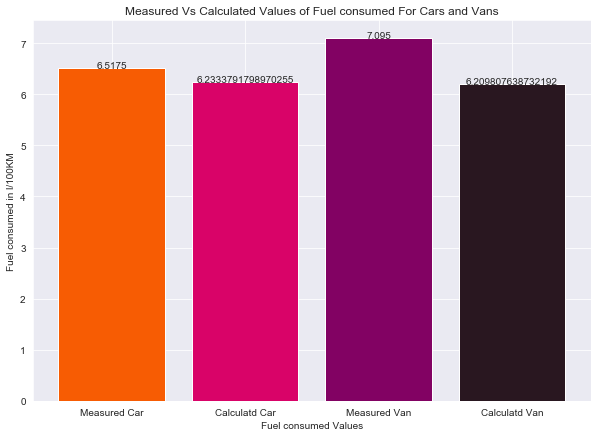

In [45]:
x_axis=['Measured Car','Calculatd Car','Measured Van','Calculatd Van']
y_axis=[]

y_axis.append(Testiing_Car['OBFCM Fuel consumption (l/100 km)'].mean())
y_axis.append(Testiing_Car['Model fuel Values'].mean())
y_axis.append(Testiing_Van['OBFCM Fuel consumption (l/100 km)'].mean())
y_axis.append(Testiing_Van['Model fuel Values'].mean())
y_axis

plt.figure(figsize=(10,7))
plt.bar(x_axis,y_axis,color=['#F75C03','#D90368','#820263','#291720'])
plt.xlabel('Fuel consumed Values')
plt.ylabel('Fuel consumed in l/100KM')
plt.title('Measured Vs Calculated Values of Fuel consumed For Cars and Vans')

plt.text(0,y_axis[0],y_axis[0],ha='center')
plt.text(1,y_axis[1],y_axis[1],ha='center')
plt.text(2,y_axis[2],y_axis[2],ha='center')
plt.text(3,y_axis[3],y_axis[3],ha='center')
plt.show()

# Accuracy in terms of percentage

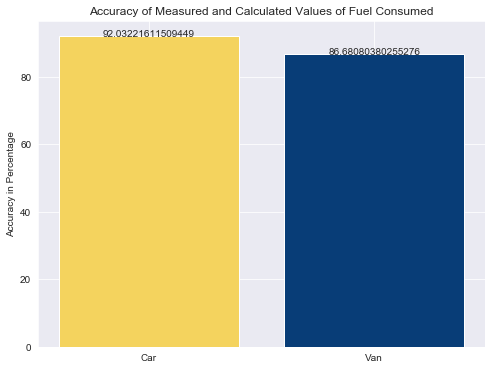

In [46]:
plt.figure(figsize=(8,6))
x_=[Testiing_Car['Fuel Accuracy'].mean(),Testiing_Van['Fuel Accuracy'].mean()]
plt.grid(True)
plt.bar(['Car','Van'],x_,color=['#F4D35E','#083D77'])
plt.text(0,x_[0],x_[0],ha='center')
plt.text(1,x_[1],x_[1],ha='center')
plt.ylabel('Accuracy in Percentage')
plt.title('Accuracy of Measured and Calculated Values of Fuel Consumed')
plt.show()


# Testing For Accuracy for Co2 Emmited

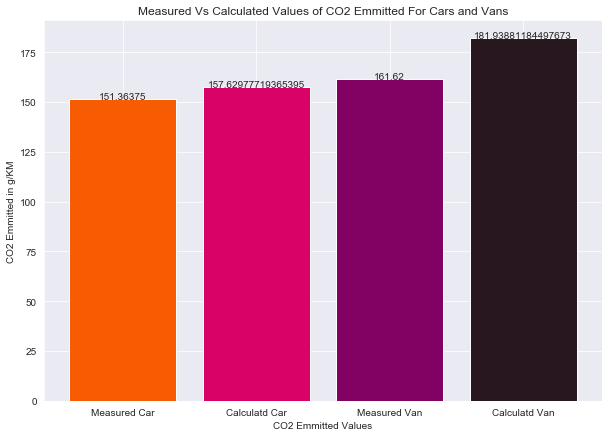

In [47]:
x_axis=['Measured Car','Calculatd Car','Measured Van','Calculatd Van']
y_axis=[]

y_axis.append(Testiing_Car['OBFCM CO2 emissions (g/km)'].mean())
y_axis.append(Testiing_Car['Model Co2 Values'].mean())
y_axis.append(Testiing_Van['OBFCM CO2 emissions (g/km)'].mean())
y_axis.append(Testiing_Van['Model Co2 Values'].mean())
y_axis

plt.figure(figsize=(10,7))
plt.bar(x_axis,y_axis,color=['#F75C03','#D90368','#820263','#291720'])
plt.xlabel('CO2 Emmitted Values')
plt.ylabel('CO2 Emmitted in g/KM')
plt.title('Measured Vs Calculated Values of CO2 Emmitted For Cars and Vans')


plt.text(0,y_axis[0],y_axis[0],ha='center')
plt.text(1,y_axis[1],y_axis[1],ha='center')
plt.text(2,y_axis[2],y_axis[2],ha='center')
plt.text(3,y_axis[3],y_axis[3],ha='center')
plt.show()

# Accuracy in terms of percentage

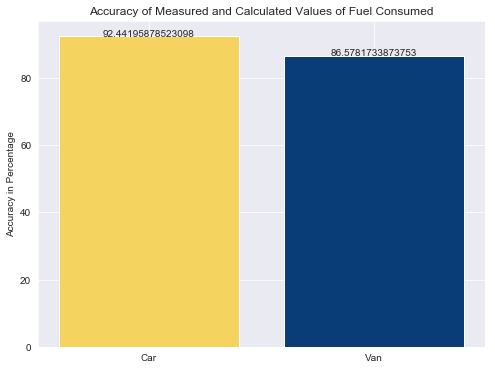

In [48]:
plt.figure(figsize=(8,6))
x_=[Testiing_Car['Co2 Accuracy'].mean(),Testiing_Van['Co2 Accuracy'].mean()]
plt.grid(True)
plt.bar(['Car','Van'],x_,color=['#F4D35E','#083D77'])
plt.text(0,x_[0],x_[0],ha='center')
plt.text(1,x_[1],x_[1],ha='center')
plt.ylabel('Accuracy in Percentage')
plt.title('Accuracy of Measured and Calculated Values of Fuel Consumed')
plt.show()

In [93]:
data=data_agg[data_agg['Type']=='car']
test_data1=data[data['Manufacturer']=='MERCEDES-BENZ AG']
test_data1=test_data1.append(data[data['Manufacturer']=='VOLVO'])
test_data1
data=data_agg[data_agg['Type']=='van']
test_data2=data[data['Manufacturer']=='MERCEDES-BENZ AG']
test_data2=test_data2.append(data[data['Manufacturer']=='VOLVO'])
test_data2=test_data2.append(test_data1)

In [108]:
temp=test_data1.groupby('Manufacturer').mean()
temp2=test_data2.groupby('Manufacturer').mean()

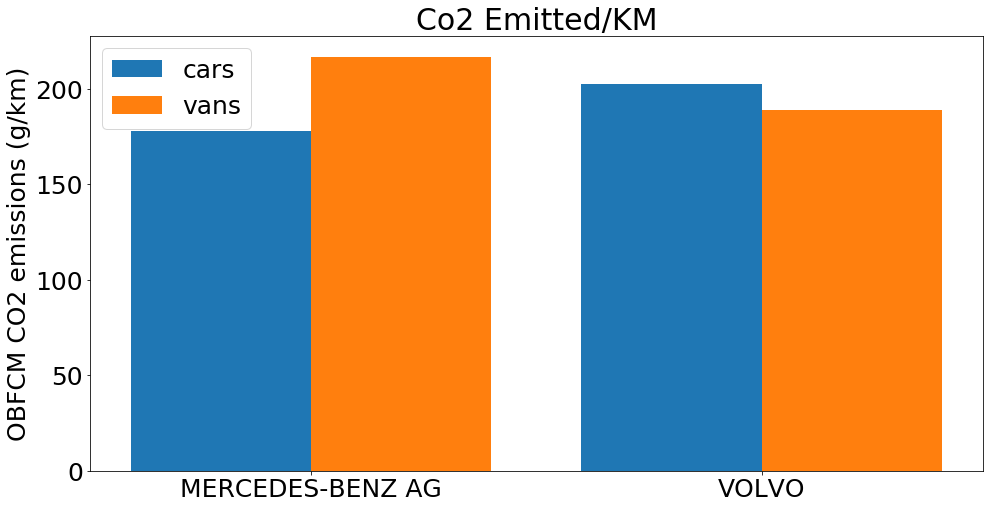

In [116]:
plt.figure(figsize=(16,8))
index=np.array([1,2])
plt.bar(index-0.2,temp['OBFCM CO2 emissions (g/km)'],0.4,label='cars')
plt.bar(index+0.2,temp2['OBFCM CO2 emissions (g/km)'],0.4,label='vans')
plt.xticks(index,temp.index)
plt.ylabel('OBFCM CO2 emissions (g/km)')
plt.title('Co2 Emitted/KM')
plt.legend()
plt.show()

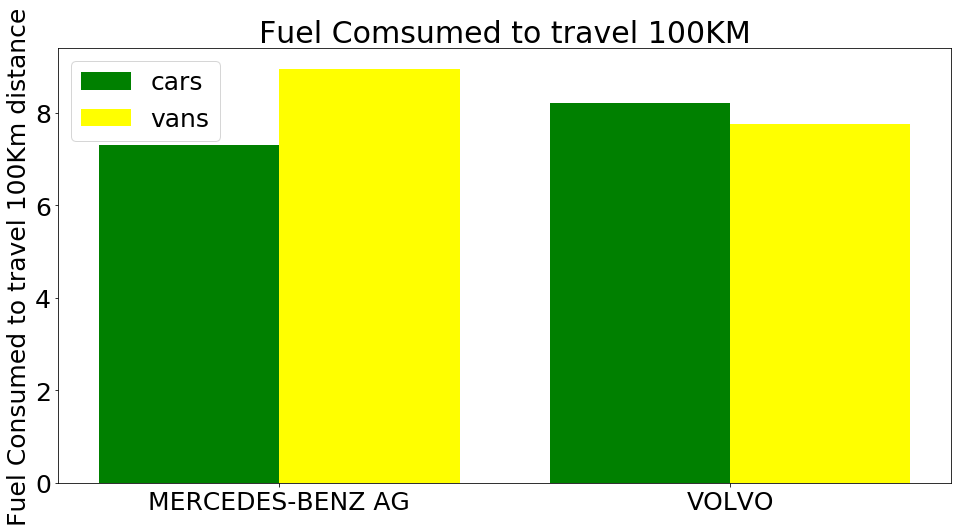

In [127]:
plt.figure(figsize=(16,8))
index=np.array([1,2])
plt.bar(index-0.2,temp['OBFCM Fuel consumption (l/100 km)'],0.4,label='cars',color=['green'])
plt.bar(index+0.2,temp2['OBFCM Fuel consumption (l/100 km)'],0.4,label='vans',color=['yellow'])
plt.xticks(index,temp.index)
plt.ylabel('Fuel Consumed to travel 100Km distance')
plt.title('Fuel Comsumed to travel 100KM')
plt.legend()
plt.show()

In [2]:
plt.figure(figsize=(16,8))
index=np.array([1,2])
plt.bar(index-0.2,temp['Avg Price (Mn.INR)'],0.4,label='cars',color=['red'])
plt.bar(index+0.2,temp2['Avg Price (Mn.INR)'],0.4,label='vans',color=['blue'])
plt.xticks(index,temp.index)
plt.ylabel('Avg Price (Mn.INR)')
plt.title('Avg Price of Cars and Vans')
plt.legend()
plt.show()

NameError: name 'temp' is not defined

<Figure size 1152x576 with 0 Axes>

In [10]:
data_agg.head()

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),...,OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%),Type,Avg Price (Mn.INR)
0,KIA,PETROL,1025,6.39,5.56,0.82,14.78,145.50,126.76,18.74,...,6.33,5.60,0.72,12.93,144.17,127.66,16.51,12.93,car,2.5
1,SKODA,PETROL,2494,7.29,6.13,1.16,18.96,166.07,139.60,26.47,...,7.16,6.12,1.03,16.90,163.03,139.45,23.57,16.90,car,3.0
2,HYUNDAI CZECH,PETROL,1592,7.22,6.26,0.95,15.23,164.36,142.64,21.72,...,7.09,6.23,0.86,13.83,161.59,141.95,19.63,13.83,car,3.0
3,TOYOTA,PETROL,6338,5.60,4.99,0.61,12.27,127.52,113.59,13.93,...,5.67,5.05,0.62,12.30,129.15,115.00,14.14,12.30,car,3.5
4,MERCEDES-BENZ AG,PETROL,29995,10.53,8.46,2.07,24.45,239.83,192.71,47.13,...,10.68,8.67,2.01,23.12,243.30,197.61,45.68,23.12,car,7.0


In [35]:
carsTest=[6.38,6,7.4,5.8,6,6.6,6.7,6.2,6.1,6.5,5.9,7.2,8,5.5,8.2,7.9,7.6,7.7,4.5,4]

carsTestResult=map(returnCo2Car,carsTest)
carsTestResult=list(carsTestResult)

In [36]:
carsTestResult=np.array(carsTestResult)
carsTestResult.round(decimals=2)
# print(len(carsTest),len(carsTestResult))
# carsTest=np.array(carsTest)

df=pd.DataFrame({"fuel consumed":carsTest,"co2 emitted":carsTestResult,"type":"car"})
df


,fuel consumed,co2 emitted,type
0,6.38,154.597339,car
1,6.00,146.216784,car
2,7.40,177.092515,car
3,5.80,141.805965,car
4,6.00,146.216784,car
5,6.60,159.449240,car
6,6.70,161.654649,car
7,6.20,150.627602,car
8,6.10,148.422193,car
9,6.50,157.243831,car


C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


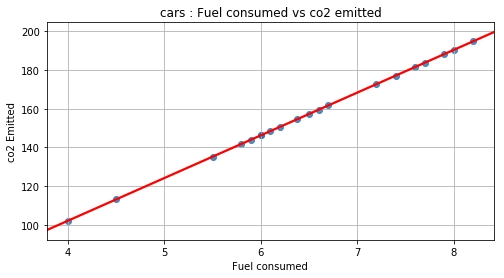

In [37]:
plt.figure(figsize=(8,4))
sns.regplot(x=carsTest,y=carsTestResult,marker='o',line_kws=dict(color='red'))
plt.xlabel('Fuel consumed',fontsize=10)
plt.ylabel('co2 Emitted',fontsize=10)
plt.title('cars : Fuel consumed vs co2 emitted')
plt.grid()
plt.show()

In [40]:
# data_agg.tail(10)

In [38]:
vansTest=[9,8.9,9.1,9.3,9.2,6,7,4.5,12,10,5.6,7.8,8,9.6,9.5,8.5,8.7,8.3,10.5,11.2,9.9]
vansTestResult=map(returnCo2Van,vansTest)
vansTestResult=list(vansTestResult)
vansTestResult
df1=pd.DataFrame({"fuel consumed":vansTest,"co2 emitted":vansTestResult,"type":"van"})
df1
# np.array(vansTestResult).round(decimals=2)

,fuel consumed,co2 emitted,type
0,9.0,225.666411,van
1,8.9,223.370999,van
2,9.1,227.961823,van
3,9.3,232.552647,van
4,9.2,230.257235,van
5,6.0,156.804050,van
6,7.0,179.758170,van
7,4.5,122.372870,van
8,12.0,294.528771,van
9,10.0,248.620531,van


C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


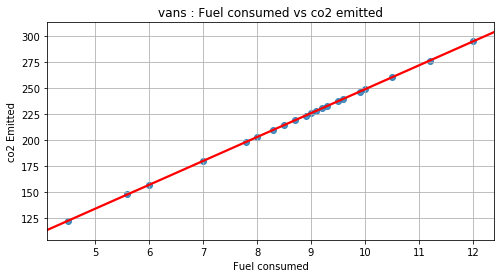

In [39]:
plt.figure(figsize=(8,4))
sns.regplot(x=vansTest,y=vansTestResult,marker='o',line_kws=dict(color='red'))
plt.xlabel('Fuel consumed',fontsize=10)
plt.ylabel('co2 Emitted',fontsize=10)
plt.title('vans : Fuel consumed vs co2 emitted')
plt.grid()
plt.show()

In [41]:
frames=[df,df1]
data_agg2=pd.concat(frames)
data_agg2

,fuel consumed,co2 emitted,type
0,6.38,154.597339,car
1,6.00,146.216784,car
2,7.40,177.092515,car
3,5.80,141.805965,car
4,6.00,146.216784,car
5,6.60,159.449240,car
6,6.70,161.654649,car
7,6.20,150.627602,car
8,6.10,148.422193,car
9,6.50,157.243831,car


C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x576 with 0 Axes>

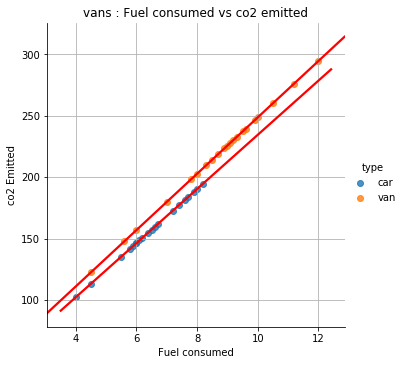

In [47]:
plt.figure(figsize=(16,8))
sns.lmplot(x='fuel consumed',y='co2 emitted',data=data_agg2,hue='type',line_kws=dict(color='red'))
plt.xlabel('Fuel consumed',fontsize=10)
plt.ylabel('co2 Emitted',fontsize=10)
plt.title('vans : Fuel consumed vs co2 emitted')
plt.grid()
plt.show()

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x720 with 0 Axes>

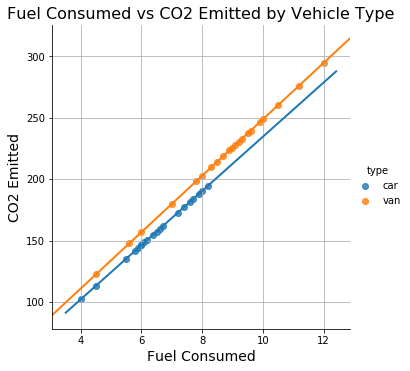

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Use sns.lmplot without plt.figure()
x=sns.lmplot(x='fuel consumed', 
           y='co2 emitted', 
           data=data_agg2, 
           hue='type',  # This will color the lines and points by 'type'
           line_kws={'linewidth':2})  # Customize line properties

plt.xlabel('Fuel Consumed', fontsize=14)
plt.ylabel('CO2 Emitted', fontsize=14)
plt.title('Fuel Consumed vs CO2 Emitted by Vehicle Type', fontsize=16)
plt.grid(True)
display(x)
